# BDTA 17: Principal Component Analysis

This uses [Intro to Pandas](http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/) to do [Principal Component Analysis](https://georgemdallas.wordpress.com/2013/10/30/principal-component-analysis-4-dummies-eigenvectors-eigenvalues-and-dimension-reduction/).

It assumes you have a CSV file with relative frequencies of documents.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Find and read in a CSV

Now we have to find the right CSV file into a dataframe. We can also get some summary information about the dataframe.

In [2]:
ls Frequencies*.csv

FrequenciesResultsShort.csv      FrequenciesResultsShortFlip.csv


In [5]:
df = pd.read_csv('FrequenciesResultsShortFlip.csv') # read in the CSV
df.rename(columns={'Unnamed: 0': 'Text'}, inplace=True) # add a label to the first column
df.head(10)

,Text,the,to,and,of,u,is,in,on,sid,...,pending,bump,group,intro,introduction,signed,unable,ais,demystifying,required
0,2003-04-01_SIDToday_-_Deployed_SIGINT_Analysts...,0.014815,0.044444,0.014815,0.011111,0.007407,0.018519,0.011111,0.011111,0.007407,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2003-04-01_SIDToday_-_Practical_Jokes_and_Apri...,0.058626,0.030151,0.023451,0.025126,0.011725,0.008375,0.015075,0.018425,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2003-04-02_SIDToday_-_Last_QUICKMASK_Training_...,0.039106,0.022346,0.016760,0.011173,0.016760,0.016760,0.005587,0.011173,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2003-04-02_SIDToday_-_New_Hire_Whats_On_Your_M...,0.036697,0.027523,0.013761,0.009174,0.018349,0.013761,0.018349,0.018349,0.018349,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2003-04-02_SIDToday_-_SIGINT_Strategy__The_Imp...,0.067442,0.032558,0.016279,0.032558,0.011628,0.018605,0.011628,0.006977,0.009302,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2003-04-03_SIDToday_-_GEOCELL_Supports_IRAQI_F...,0.043228,0.025937,0.043228,0.031700,0.005764,0.008646,0.025937,0.017291,0.005764,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,2003-04-03_SIDToday_-_SID_Leadership_Transitio...,0.046647,0.036443,0.040816,0.018950,0.007289,0.010204,0.020408,0.004373,0.001458,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,2003-04-03_SIDToday_-_Schedule_for_3rd_and_4th...,0.012407,0.057072,0.007444,0.002481,0.007444,0.003722,0.003722,0.001241,0.001241,...,0.001241,0.001241,0.001241,0.001241,0.001241,0.001241,0.001241,0.001241,0.001241,0.001241
8,2003-04-04_SIDToday_-_Profiles_SID_Communicati...,0.030888,0.023166,0.030888,0.027027,0.019305,0.007722,0.000000,0.003861,0.030888,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,2003-04-04_SIDToday_-_Read_All_About_Us.pdf.txt,0.054348,0.015217,0.021739,0.039130,0.008696,0.013043,0.023913,0.008696,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Explore dataframe

Now we can explore the dataframe with pandas methods.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Columns: 1472 entries, Text to required
dtypes: float64(1471), object(1)
memory usage: 184.1+ KB


In [7]:
df.describe()

,the,to,and,of,u,is,in,on,sid,sigint,...,pending,bump,group,intro,introduction,signed,unable,ais,demystifying,required
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,...,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.043725,0.031197,0.024809,0.021139,0.013165,0.011425,0.010685,0.010217,0.009920,0.009784,...,0.000078,0.000078,0.000078,0.000078,0.000078,0.000078,0.000078,0.000078,0.000078,0.000078
std,0.017193,0.011679,0.010615,0.009487,0.005129,0.004282,0.008496,0.005326,0.011183,0.009370,...,0.000310,0.000310,0.000310,0.000310,0.000310,0.000310,0.000310,0.000310,0.000310,0.000310
min,0.012407,0.015217,0.007444,0.002481,0.005764,0.003722,0.000000,0.001241,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031387,0.022961,0.016640,0.016768,0.008383,0.008578,0.003651,0.006785,0.001403,0.002060,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.044906,0.029051,0.022364,0.021232,0.013040,0.010257,0.011370,0.009358,0.006586,0.007285,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.057667,0.038202,0.032263,0.025635,0.017330,0.014132,0.015894,0.014314,0.013558,0.014025,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.070938,0.057072,0.043228,0.039130,0.021341,0.018605,0.025937,0.018425,0.033981,0.030233,...,0.001241,0.001241,0.001241,0.001241,0.001241,0.001241,0.001241,0.001241,0.001241,0.001241


In [4]:
print(list(df.columns.values))

['Text', 'the', 'to', 'and', 'of', 'u', 'is', 'in', 'on', 'sid', 'sigint', 'a', 'si', 's', 'fouo', 'ï', 'for', 'that', 'from', 'be', 'can', 'nsa', 'top', 'page', 'support', 'classification', 'usa', 'possible', 'secret', 'gbr', 'rel', 'aus', 'highest', 'nzl', 'tk', 'dynamic', 'our', 'this', 'we', 'are', 'or', 'you', 'as', 'not', 'it', 'will', 'may', 'communications', 'with', 'profile', 'operations', 'an', 'people', 'i', 'have', 'derived', 'without', 'intelligence', 'jan', 'date', 'reposted', 'cssm', 'consent', 'outside', 'republished', 'run', 'sidtoday', 'articles', 'declassify', 'dated', 'nsanet', 'dl', 'rm', 'information', 'by', 'at', 'your', 'if', 'please', 'all', 'strategy', 'what', 'team', 'services', 'registry', 'more', 'office', 'they', 'also', 'has', 'day', 'work', 'comms', 'north', 'staff', 'was', 'hqs', 'us', 'april', 'time', 'program', 'chief', 'iraq', 'who', 'icap', 'there', 'training', 'were', 'today', 'these', 'contact', 'see', 'been', 'other', 'their', 'director', 'perfor

In [65]:
len(list(df.columns.values))

1472

## Plotting words

We can plot words accross the collection. I show different ways of doing this.

In the first case we use the labels of the columents to pick what to plot. This way you can plot any words you want.

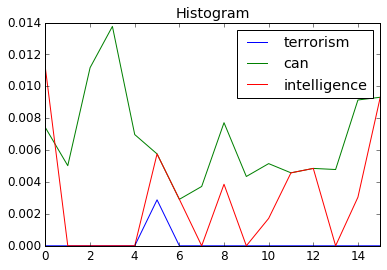

In [49]:
df[['terrorism','can','intelligence']].plot()
plt.title('Histogram')
# plt.savefig('wordhistograms.png', bbox_inches='tight') # export image

In this second example we are setting the short file name as the label and showing bar graphs.

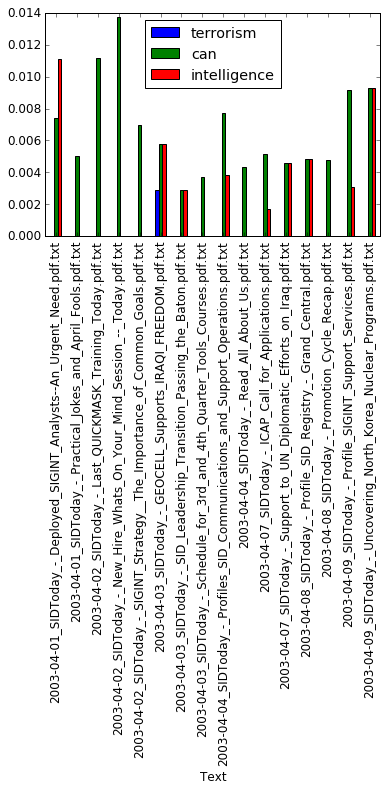

In [50]:
indexed_df = df.set_index(['Text']) # sets the "Text" column to be the index of labels
my_plot = indexed_df[['terrorism','can','intelligence']].plot(kind='bar')

## Principal component analysis

Here we see how to do PCA. We can pick how to select columns. One way is to give a list of names for the columns, one is to give the numbers of the columns, and one is to give a range columns.

> `df2 = df.ix[1:,listOfWords]`

> `df2 = df.ix[1:,[3,4,5,6,7,8,9]`

> `df2 = df.ix[1:,1:400]`

In [85]:
# Decide how many components you want - you can't have more than columns
howManyComps = 4
# Provide the list 
listOfWords = ['intelligence','possible','support','information','declassify','customer','consent']

from sklearn.decomposition import PCA

df2 = df.ix[1:,listOfWords] # df2 = df.ix[1:,1:400] or df2 = df.ix[1:,[3,4,5,6]]

pca = PCA(n_components=howManyComps)
pca.fit(df2) 

X = pca.transform(df2)

print("Done")

Done


### Getting and plotting variance of components

Now we get the variance ration of each component.

In [89]:
print(pca.explained_variance_ratio_)
type(pca.explained_variance_ratio_)

[ 0.82181352  0.10513347  0.0581622   0.00988111]


numpy.ndarray

Now we graph the variance.

<Container object of 4 artists>

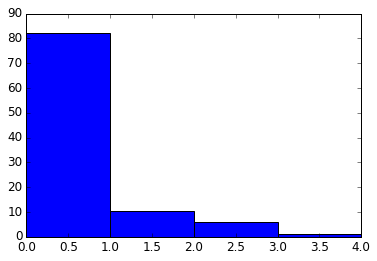

In [96]:
variance = pca.explained_variance_ratio_.tolist() # turn numpy.ndarray into a list
variance2 = [i * 100 for i in variance] # this multiplies by 100 to get percentage
y = variance2
N = len(y)
x = range(N)
width = 1
plt.bar(x, y, width, color="blue")

## Graph the documents in 2D scatter

Now we want to take our documents and plot them in two of the new components. The `xAxisCom` is the Component to be used for the X axis and the `yAxisComp` is for the Y axis. You can graph any two components against each other up to the number of components you generated.

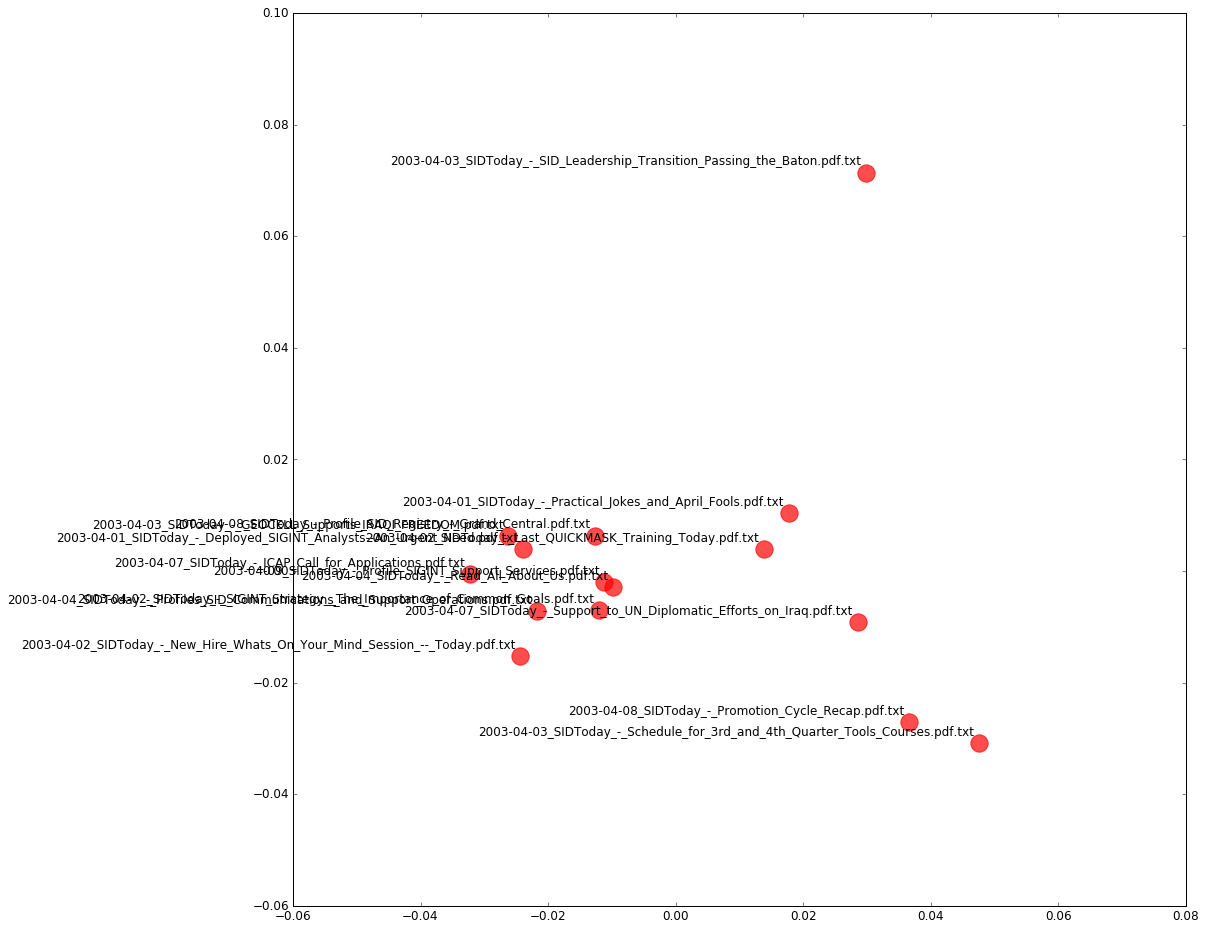

In [74]:
xAxisComp = 0
yAxisComp = 1
labels = df['Text'].tolist()

plt.figure(figsize=(16, 16))
plt.scatter(X[:,xAxisComp],X[:,yAxisComp],marker='o',
            color='r',
            alpha=0.7,
            s = 300,
            )

for label, x, y in zip(labels, X[:,xAxisComp],X[:,yAxisComp]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-5, 5),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        # bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        # arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
        )

plt.show()

----
# Homework

Create a notebook that:
* Calculates the relative frequency of words in a set of documents in a folder. (See Lesson 16 for how to do that.)
* Saves the table of frequencies as a CSV.
* Loads the CSV and 